In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("data.csv", dtype = {'PRICE_NOTATION':'float','ROUNDED_NOTIONAL_AMOUNT_1':'float'})
original = pd.read_csv('clean_version2.csv',dtype = {'PRICE_NOTATION':'float','ROUNDED_NOTIONAL_AMOUNT_1':'float'})

In [4]:
original.shape[0]

11936

In [5]:
data.shape[0]

719283

In [27]:
data.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [28]:
data.head()

,ACTION,CLEARED,INDICATION_OF_COLLATERALIZATION,TAXONOMY,PRICE_FORMING_CONTINUATION_DATA,PRICE_NOTATION,ROUNDED_NOTIONAL_AMOUNT_1
0,NEW,U,UC,IG,Novation,0.5,95.0
1,NEW,U,PC,IG,Partialtermination,75.0,3.5
2,NEW,U,PC,IG,Novation,0.5,7.5
3,NEW,U,UC,IG,Novation,0.5,65.0
4,NEW,U,PC,IG,Partialtermination,75.0,3.5


In [5]:
original.head()

,ACTION,CLEARED,INDICATION_OF_COLLATERALIZATION,TAXONOMY,PRICE_FORMING_CONTINUATION_DATA,PRICE_NOTATION,ROUNDED_NOTIONAL_AMOUNT_1
0,NEW,U,UC,Credit:Index:CDX:CDXIG,Trade,1.00,100.0
1,NEW,U,PC,Credit:Index:CDX:CDXIG,Trade,1.00,30.0
2,CORRECT,U,PC,Credit:Index:CDX:CDXIG,Trade,1.00,30.0
3,NEW,U,PC,Credit:Index:CDX:CDXIG,Novation,1.24,25.0
4,CORRECT,C,UC,Credit:Index:CDX:CDXHY,Trade,1.00,5.0


In [29]:
merged = data.merge(original, indicator=True, how='outer')

In [30]:
merged.head()

,ACTION,CLEARED,INDICATION_OF_COLLATERALIZATION,TAXONOMY,PRICE_FORMING_CONTINUATION_DATA,PRICE_NOTATION,ROUNDED_NOTIONAL_AMOUNT_1,_merge
0,NEW,U,UC,IG,Novation,0.5,95.0,left_only
1,NEW,U,UC,IG,Novation,0.5,95.0,left_only
2,NEW,U,UC,IG,Novation,0.5,95.0,left_only
3,NEW,U,UC,IG,Novation,0.5,95.0,left_only
4,NEW,U,UC,IG,Novation,0.5,95.0,left_only


In [21]:
original.loc[(original['PRICE_NOTATION'] == 0.5) & (original['ROUNDED_NOTIONAL_AMOUNT_1'] == 85.0)]

,ACTION,CLEARED,INDICATION_OF_COLLATERALIZATION,TAXONOMY,PRICE_FORMING_CONTINUATION_DATA,PRICE_NOTATION,ROUNDED_NOTIONAL_AMOUNT_1
8362,CORRECT,C,UC,Credit:Index:CDX:CDXIG,Trade,0.5,85.0


In [16]:
merged[merged['_merge'] == 'both']

,ACTION,CLEARED,INDICATION_OF_COLLATERALIZATION,TAXONOMY,PRICE_FORMING_CONTINUATION_DATA,PRICE_NOTATION,ROUNDED_NOTIONAL_AMOUNT_1,_merge
427955,CORRECT,C,UC,Credit:Index:CDX:CDXIG,Trade,0.5,85.0,both
427956,CORRECT,C,UC,Credit:Index:CDX:CDXIG,Trade,0.5,85.0,both
427957,CORRECT,C,UC,Credit:Index:CDX:CDXIG,Trade,0.5,85.0,both
427958,CORRECT,C,UC,Credit:Index:CDX:CDXIG,Trade,0.5,85.0,both
427959,CORRECT,C,UC,Credit:Index:CDX:CDXIG,Trade,0.5,85.0,both
427960,CORRECT,C,UC,Credit:Index:CDX:CDXIG,Trade,0.5,85.0,both
427961,CORRECT,C,UC,Credit:Index:CDX:CDXIG,Trade,0.5,85.0,both
427962,CORRECT,C,UC,Credit:Index:CDX:CDXIG,Trade,0.5,85.0,both
427963,CORRECT,C,UC,Credit:Index:CDX:CDXIG,Trade,0.5,85.0,both
427964,CORRECT,C,UC,Credit:Index:CDX:CDXIG,Trade,0.5,85.0,both


In [22]:
merged[merged['_merge'] == 'both'].shape[0]

3947

In [31]:
sub_data = data[-100000:]

# Percentage of generated data

## Action

In [122]:
# New
new_action = data.groupby('ACTION')['ACTION'].count().rename('COUNT').reset_index()
new_action

,ACTION,COUNT
0,CANCEL,21462
1,CORRECT,127373
2,NEW,570448


In [159]:
sub_action = sub_data.groupby('ACTION')['ACTION'].count().rename('COUNT').reset_index()
sub_action

,ACTION,COUNT
0,CANCEL,2944
1,CORRECT,17892
2,NEW,79164


In [123]:
# Original
original_action = original.groupby('ACTION')['ACTION'].count().rename('COUNT').reset_index()
original_action

,ACTION,COUNT
0,CANCEL,35
1,CORRECT,2997
2,NEW,8904


In [172]:
def plot_pie(label_0, label_1, label_2, size_0, size_1, size_2, explode):
    
    fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5))
    ax[0].pie(size_0, explode = explode, labels=label_0, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax[0].set_title('Sub_data')
    ax[1].pie(size_1, explode=explode, labels=label_1, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax[1].set_title('New_data')
    ax[2].pie(size_2, explode=explode, labels=label_2, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax[2].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax[2].set_title('Original_data')
    plt.show()

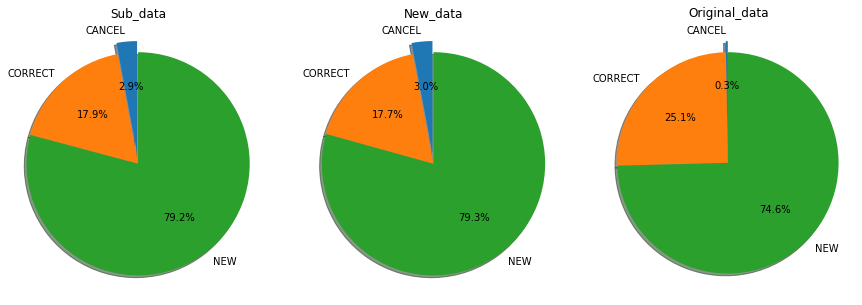

In [173]:
label_0 = sub_action['ACTION']
size_0 = sub_action['COUNT']
label_1 = new_action['ACTION']
size_1 = new_action['COUNT']
label_2 = original_action['ACTION']
size_2 = original_action['COUNT']
explode = (0.1, 0, 0) # only "explode" the 1st slice (i.e. cancel)
plot_pie(label_0, label_1, label_2, size_0, size_1, size_2, explode)

## Cleared

In [126]:
# New
new_clear = data.groupby('CLEARED')['CLEARED'].count().rename('COUNT').reset_index()
new_clear

,CLEARED,COUNT
0,C,153442
1,U,565841


In [166]:
# sub data
sub_cleared = sub_data.groupby('CLEARED')['CLEARED'].count().rename('COUNT').reset_index()
sub_cleared

,CLEARED,COUNT
0,C,21088
1,U,78912


In [127]:
# Original
original_clear = original.groupby('CLEARED')['CLEARED'].count().rename('COUNT').reset_index()
original_clear

,CLEARED,COUNT
0,C,6355
1,U,5581


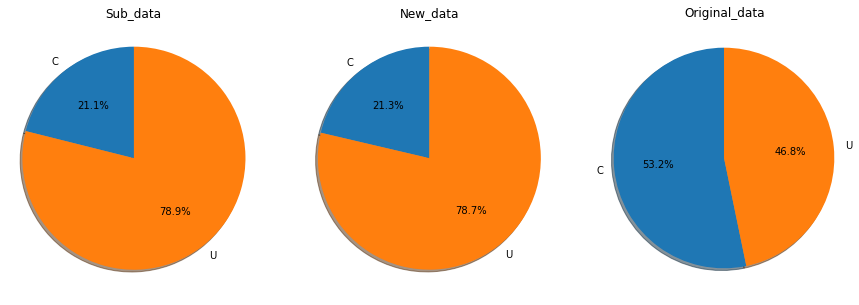

In [174]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
label_0 = sub_cleared['CLEARED']
size_0 = sub_cleared['COUNT']
label_1 = new_clear['CLEARED']
size_1 = new_clear['COUNT']
label_2 = original_clear['CLEARED']
size_2 = original_clear['COUNT']
explode = (0, 0)  # only "explode" the 1st slice (i.e. cancel)
plot_pie(label_0, label_1, label_2, size_0, size_1, size_2, explode)

# Collateralization

In [169]:
# New
new_collateral = data.groupby('INDICATION_OF_COLLATERALIZATION')['INDICATION_OF_COLLATERALIZATION'].count().rename('COUNT').reset_index()
# Original
original_collateral = original.groupby('INDICATION_OF_COLLATERALIZATION')['INDICATION_OF_COLLATERALIZATION'].count().rename('COUNT').reset_index()
sub_collateral = sub_data.groupby('INDICATION_OF_COLLATERALIZATION')['INDICATION_OF_COLLATERALIZATION'].count().rename('COUNT').reset_index()


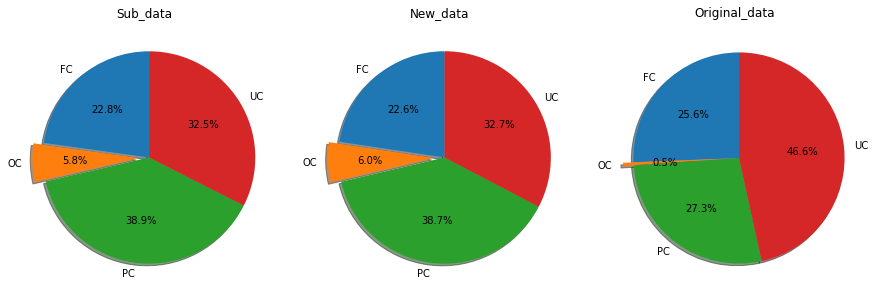

In [177]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
label_0 = sub_collateral['INDICATION_OF_COLLATERALIZATION']
size_0 = sub_collateral['COUNT']
label_1 = new_collateral['INDICATION_OF_COLLATERALIZATION']
size_1 = new_collateral['COUNT']
label_2 = original_collateral['INDICATION_OF_COLLATERALIZATION']
size_2 = original_collateral['COUNT']
explode = (0, 0.1, 0, 0) 
plot_pie(label_0, label_1, label_2, size_0, size_1, size_2, explode)

# Taxonomy

In [178]:
# New
new_taxonomy = data.groupby('TAXONOMY')['TAXONOMY'].count().rename('COUNT').reset_index()
# Original
original_taxonomy = original.groupby('TAXONOMY')['TAXONOMY'].count().rename('COUNT').reset_index()
sub_taxonomy = sub_data.groupby('TAXONOMY')['TAXONOMY'].count().rename('COUNT').reset_index()

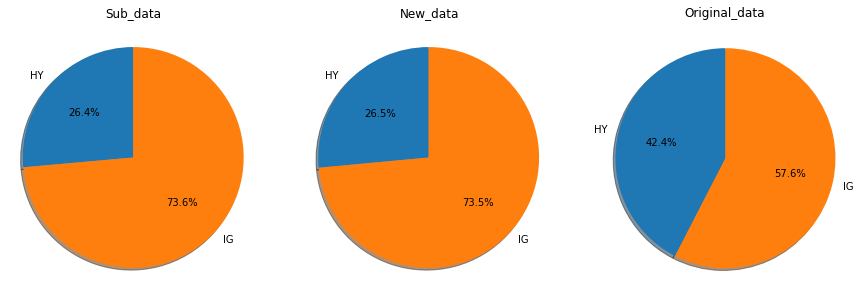

In [179]:
label_0 = sub_taxonomy['TAXONOMY']
size_0 = sub_taxonomy['COUNT']
label_1 = new_taxonomy['TAXONOMY']
size_1 = new_taxonomy['COUNT']
label_2 = original_taxonomy['TAXONOMY']
size_2 = original_taxonomy['COUNT']
explode = (0, 0) 
plot_pie(label_0, label_1, label_2, size_0, size_1, size_2, explode)

# Price forming continuation data

In [182]:
# New
new_form = data.groupby('PRICE_FORMING_CONTINUATION_DATA')['PRICE_FORMING_CONTINUATION_DATA'].count().rename('COUNT').reset_index()
# Original
original_form = original.groupby('PRICE_FORMING_CONTINUATION_DATA')['PRICE_FORMING_CONTINUATION_DATA'].count().rename('COUNT').reset_index()
# Subdata
sub_form = sub_data.groupby('PRICE_FORMING_CONTINUATION_DATA')['PRICE_FORMING_CONTINUATION_DATA'].count().rename('COUNT').reset_index()


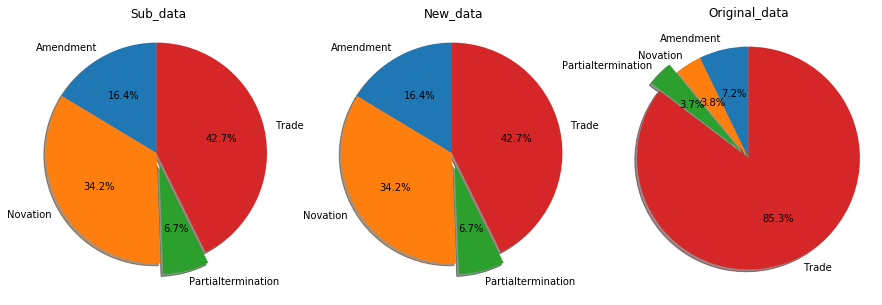

In [183]:
label_0 = sub_form['PRICE_FORMING_CONTINUATION_DATA']
size_0 = sub_form['COUNT']
label_1 = new_form['PRICE_FORMING_CONTINUATION_DATA']
size_1 = new_form['COUNT']
label_2 = original_form['PRICE_FORMING_CONTINUATION_DATA']
size_2 = original_form['COUNT']
explode = (0,0,0.1,0)
plot_pie(label_0, label_1, label_2, size_0, size_1, size_2, explode)

# Price and amount distrbution

In [136]:
def plot_distribution(label_1, label_2, size_1, size_2, explode_1, explode_2):
    
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5))
    ax[0].hist(size_1, explode=explode_1, labels=label_1, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax[0].set_title('New')  # Equal aspect ratio ensures that pie is drawn as a circle.

    ax[1].pie(size_2, explode=explode_2, labels=label_2, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax[1].set_title('original')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

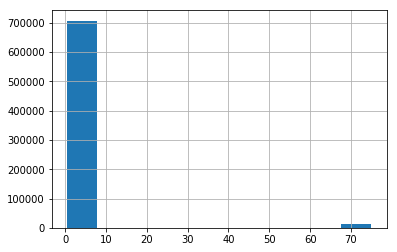

In [137]:
data['PRICE_NOTATION'].hist()

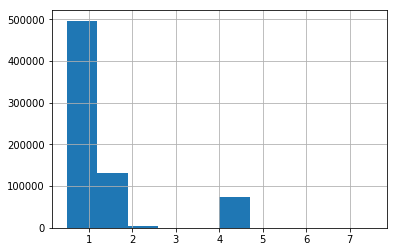

In [138]:
data[data['PRICE_NOTATION']<10]['PRICE_NOTATION'].hist()

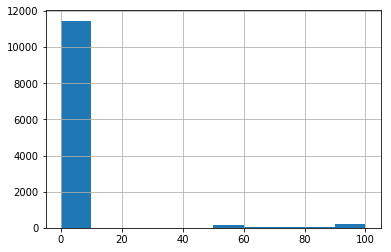

In [139]:
original['PRICE_NOTATION'].hist()

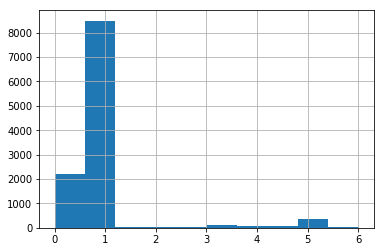

In [140]:
original[original['PRICE_NOTATION']<10]['PRICE_NOTATION'].hist()

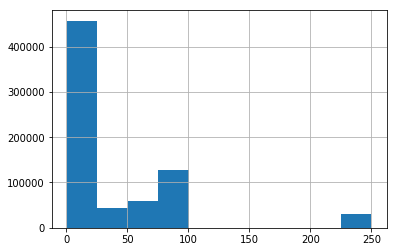

In [141]:
data['ROUNDED_NOTIONAL_AMOUNT_1'].hist()

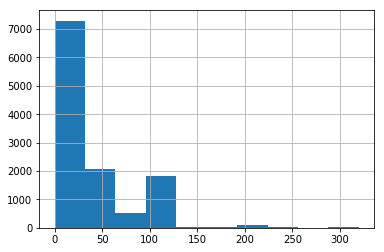

In [142]:
original['ROUNDED_NOTIONAL_AMOUNT_1'].hist()

# EDA_Correlation

In [28]:
data.shape[0]

719283

In [32]:
data.replace({"Credit:Index:CDX:CDXIG":"IG","Credit:Index:CDX:CDXHY":'HY'},inplace = True)
data.head()

,ACTION,CLEARED,INDICATION_OF_COLLATERALIZATION,TAXONOMY,PRICE_FORMING_CONTINUATION_DATA,PRICE_NOTATION,ROUNDED_NOTIONAL_AMOUNT_1
0,NEW,U,UC,IG,Novation,0.5,95.0
1,NEW,U,PC,IG,Partialtermination,75.0,3.5
2,NEW,U,PC,IG,Novation,0.5,7.5
3,NEW,U,UC,IG,Novation,0.5,65.0
4,NEW,U,PC,IG,Partialtermination,75.0,3.5


In [9]:
data.dtypes

Unnamed: 0                           int64
ACTION                              object
CLEARED                             object
INDICATION_OF_COLLATERALIZATION     object
TAXONOMY                            object
PRICE_FORMING_CONTINUATION_DATA     object
PRICE_NOTATION                     float64
ROUNDED_NOTIONAL_AMOUNT_1          float64
dtype: object

In [33]:
obj_data = data.select_dtypes(include=['object']).copy()
obj_data = obj_data.astype('category')
obj_data.dtypes

ACTION                             category
CLEARED                            category
INDICATION_OF_COLLATERALIZATION    category
TAXONOMY                           category
PRICE_FORMING_CONTINUATION_DATA    category
dtype: object

In [34]:
obj_data['ACTION'] = obj_data['ACTION'].cat.codes
obj_data['CLEARED'] = obj_data['CLEARED'].cat.codes
obj_data['INDICATION_OF_COLLATERALIZATION'] = obj_data['INDICATION_OF_COLLATERALIZATION'].cat.codes
obj_data['TAXONOMY'] = obj_data['TAXONOMY'].cat.codes
obj_data['PRICE_FORMING_CONTINUATION_DATA'] = obj_data['PRICE_FORMING_CONTINUATION_DATA'].cat.codes
obj_data['PRICE_NOTATION'] = data['PRICE_NOTATION']
obj_data['ROUNDED_NOTIONAL_AMOUNT_1'] = data['ROUNDED_NOTIONAL_AMOUNT_1']
obj_data.head()

,ACTION,CLEARED,INDICATION_OF_COLLATERALIZATION,TAXONOMY,PRICE_FORMING_CONTINUATION_DATA,PRICE_NOTATION,ROUNDED_NOTIONAL_AMOUNT_1
0,2,1,3,1,1,0.5,95.0
1,2,1,2,1,2,75.0,3.5
2,2,1,2,1,1,0.5,7.5
3,2,1,3,1,1,0.5,65.0
4,2,1,2,1,2,75.0,3.5


In [35]:
obj_data.rename(columns = {"INDICATION_OF_COLLATERALIZATION":"COLLATERALIZATION","PRICE_FORMING_CONTINUATION_DATA":'PRICE_FORMING',
                 "ROUNDED_NOTIONAL_AMOUNT_1":"AMOUNT", "PRICE_NOTATION":"PRICE"}, inplace = True)



In [36]:
obj_data.corr()

,ACTION,CLEARED,COLLATERALIZATION,TAXONOMY,PRICE_FORMING,PRICE,AMOUNT
ACTION,1.000000,0.090063,-0.114246,0.200512,-0.319311,0.047119,-0.027385
CLEARED,0.090063,1.000000,-0.008086,0.023922,-0.146430,0.079379,-0.096468
COLLATERALIZATION,-0.114246,-0.008086,1.000000,0.046866,0.089117,0.022962,0.287763
TAXONOMY,0.200512,0.023922,0.046866,1.000000,-0.477070,-0.008528,0.128230
PRICE_FORMING,-0.319311,-0.146430,0.089117,-0.477070,1.000000,0.101519,0.033296
PRICE,0.047119,0.079379,0.022962,-0.008528,0.101519,1.000000,-0.055787
AMOUNT,-0.027385,-0.096468,0.287763,0.128230,0.033296,-0.055787,1.000000


In [17]:
original.replace({"Credit:Index:CDX:CDXIG":"IG","Credit:Index:CDX:CDXHY":'HY'},inplace = True)
original.head()

,ACTION,CLEARED,INDICATION_OF_COLLATERALIZATION,TAXONOMY,PRICE_FORMING_CONTINUATION_DATA,PRICE_NOTATION,ROUNDED_NOTIONAL_AMOUNT_1
0,NEW,U,UC,IG,Trade,1.00,100.0
1,NEW,U,PC,IG,Trade,1.00,30.0
2,CORRECT,U,PC,IG,Trade,1.00,30.0
3,NEW,U,PC,IG,Novation,1.24,25.0
4,CORRECT,C,UC,HY,Trade,1.00,5.0


In [18]:
obj_original = original.select_dtypes(include=['object']).copy()
obj_original = obj_original.astype('category')
obj_original['ACTION'] = obj_original['ACTION'].cat.codes
obj_original['CLEARED'] = obj_original['CLEARED'].cat.codes
obj_original['INDICATION_OF_COLLATERALIZATION'] = obj_original['INDICATION_OF_COLLATERALIZATION'].cat.codes
obj_original['TAXONOMY'] = obj_original['TAXONOMY'].cat.codes
obj_original['PRICE_FORMING_CONTINUATION_DATA'] = obj_original['PRICE_FORMING_CONTINUATION_DATA'].cat.codes
obj_original['PRICE_NOTATION'] = original['PRICE_NOTATION']
obj_original['ROUNDED_NOTIONAL_AMOUNT_1'] = original['ROUNDED_NOTIONAL_AMOUNT_1']

In [19]:
obj_original.rename(columns = {"INDICATION_OF_COLLATERALIZATION":"COLLATERALIZATION","PRICE_FORMING_CONTINUATION_DATA":'PRICE_FORMING',
                 "ROUNDED_NOTIONAL_AMOUNT_1":"AMOUNT", "PRICE_NOTATION":"PRICE"}, inplace = True)


In [20]:
obj_original.corr()

,ACTION,CLEARED,COLLATERALIZATION,TAXONOMY,PRICE_FORMING,PRICE,AMOUNT
ACTION,1.000000,0.307754,-0.303599,0.099271,-0.188444,0.090988,0.112336
CLEARED,0.307754,1.000000,-0.427793,-0.061559,-0.107505,0.205197,-0.034348
COLLATERALIZATION,-0.303599,-0.427793,1.000000,0.123740,0.237009,-0.145270,-0.008951
TAXONOMY,0.099271,-0.061559,0.123740,1.000000,-0.052417,-0.072063,0.410575
PRICE_FORMING,-0.188444,-0.107505,0.237009,-0.052417,1.000000,-0.081210,-0.011378
PRICE,0.090988,0.205197,-0.145270,-0.072063,-0.081210,1.000000,-0.028458
AMOUNT,0.112336,-0.034348,-0.008951,0.410575,-0.011378,-0.028458,1.000000


In [37]:
sub_data.replace({"Credit:Index:CDX:CDXIG":"IG","Credit:Index:CDX:CDXHY":'HY'},inplace = True)
sub_data.head()

/Users/shuang/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3798: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


,ACTION,CLEARED,INDICATION_OF_COLLATERALIZATION,TAXONOMY,PRICE_FORMING_CONTINUATION_DATA,PRICE_NOTATION,ROUNDED_NOTIONAL_AMOUNT_1
619283,NEW,U,FC,IG,Trade,0.5,45.0
619284,CORRECT,C,UC,IG,Trade,0.5,85.0
619285,NEW,C,OC,IG,Trade,0.5,7.5
619286,CORRECT,U,PC,HY,Trade,1.5,1.5
619287,NEW,C,FC,HY,Trade,1.5,15.0


In [38]:
obj_sub = sub_data.select_dtypes(include=['object']).copy()
obj_sub = obj_sub.astype('category')
obj_sub['ACTION'] = obj_sub['ACTION'].cat.codes
obj_sub['CLEARED'] = obj_sub['CLEARED'].cat.codes
obj_sub['INDICATION_OF_COLLATERALIZATION'] = obj_sub['INDICATION_OF_COLLATERALIZATION'].cat.codes
obj_sub['TAXONOMY'] = obj_sub['TAXONOMY'].cat.codes
obj_sub['PRICE_FORMING_CONTINUATION_DATA'] = obj_sub['PRICE_FORMING_CONTINUATION_DATA'].cat.codes
obj_sub['PRICE_NOTATION'] = sub_data['PRICE_NOTATION']
obj_sub['ROUNDED_NOTIONAL_AMOUNT_1'] = sub_data['ROUNDED_NOTIONAL_AMOUNT_1']

In [40]:
obj_sub.rename(columns = {"INDICATION_OF_COLLATERALIZATION":"COLLATERALIZATION","PRICE_FORMING_CONTINUATION_DATA":'PRICE_FORMING',
                 "ROUNDED_NOTIONAL_AMOUNT_1":"AMOUNT", "PRICE_NOTATION":"PRICE"}, inplace = True)


In [41]:
obj_sub.corr()

,ACTION,CLEARED,COLLATERALIZATION,TAXONOMY,PRICE_FORMING,PRICE,AMOUNT
ACTION,1.000000,0.094411,-0.117994,0.195809,-0.318812,0.049303,-0.025717
CLEARED,0.094411,1.000000,-0.005679,0.023616,-0.149160,0.079288,-0.092876
COLLATERALIZATION,-0.117994,-0.005679,1.000000,0.044587,0.090999,0.023299,0.293372
TAXONOMY,0.195809,0.023616,0.044587,1.000000,-0.476601,-0.005580,0.126911
PRICE_FORMING,-0.318812,-0.149160,0.090999,-0.476601,1.000000,0.101245,0.034835
PRICE,0.049303,0.079288,0.023299,-0.005580,0.101245,1.000000,-0.053175
AMOUNT,-0.025717,-0.092876,0.293372,0.126911,0.034835,-0.053175,1.000000


Text(0.5,1,'Original')

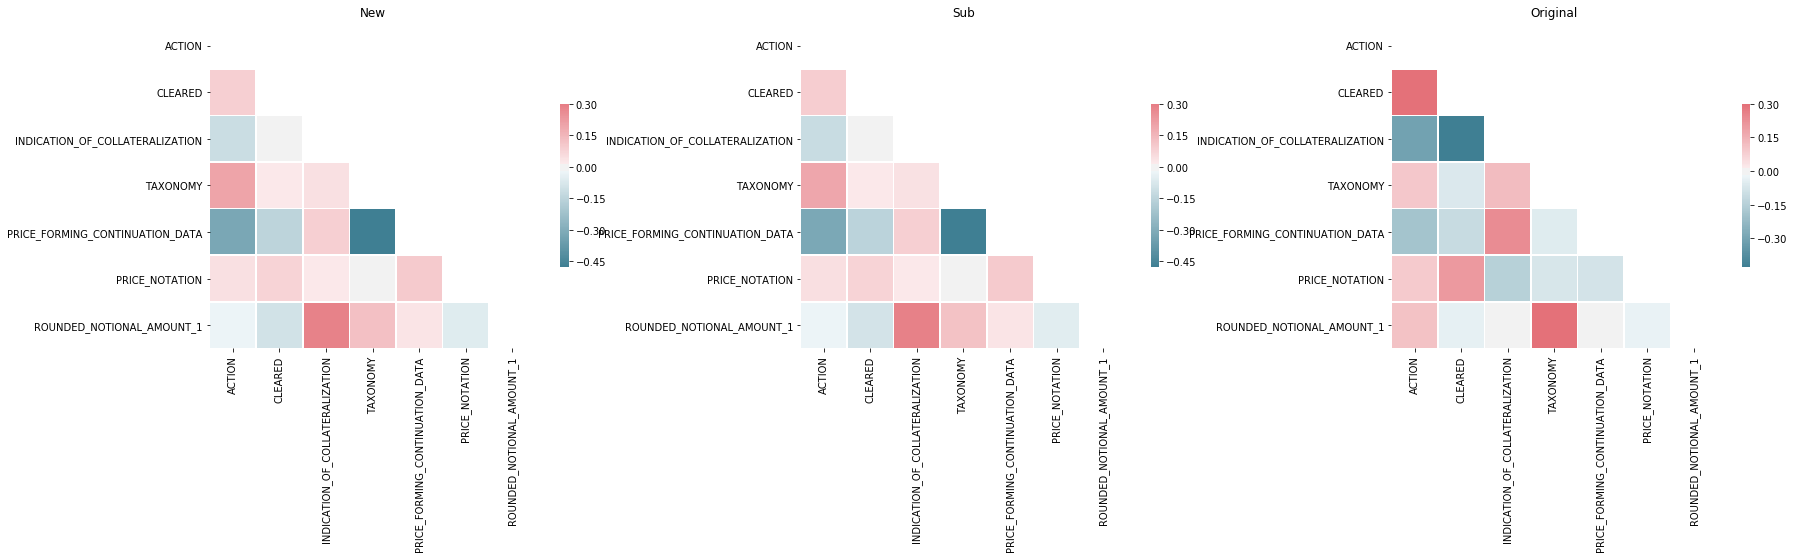

In [193]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Compute the correlation matrix
corr_1 = obj_data.corr()
corr_2 = obj_sub.corr()
corr_3 = obj_original.corr()

# Generate a mask for the upper triangle
mask_1 = np.zeros_like(corr_1, dtype=np.bool)
mask_1[np.triu_indices_from(mask)] = True

mask_2 = np.zeros_like(corr_2, dtype=np.bool)
mask_2[np.triu_indices_from(mask)] = True

mask_3 = np.zeros_like(corr_3, dtype=np.bool)
mask_3[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(30, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_1, mask=mask_1, ax = ax[0], cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax[0].set_title("New")

sns.heatmap(corr_2, mask=mask_2, ax = ax[1], cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax[1].set_title("Sub")

sns.heatmap(corr_3, mask=mask_3, ax = ax[2], cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax[2].set_title("Original")

Text(0.5,1,'Subset')

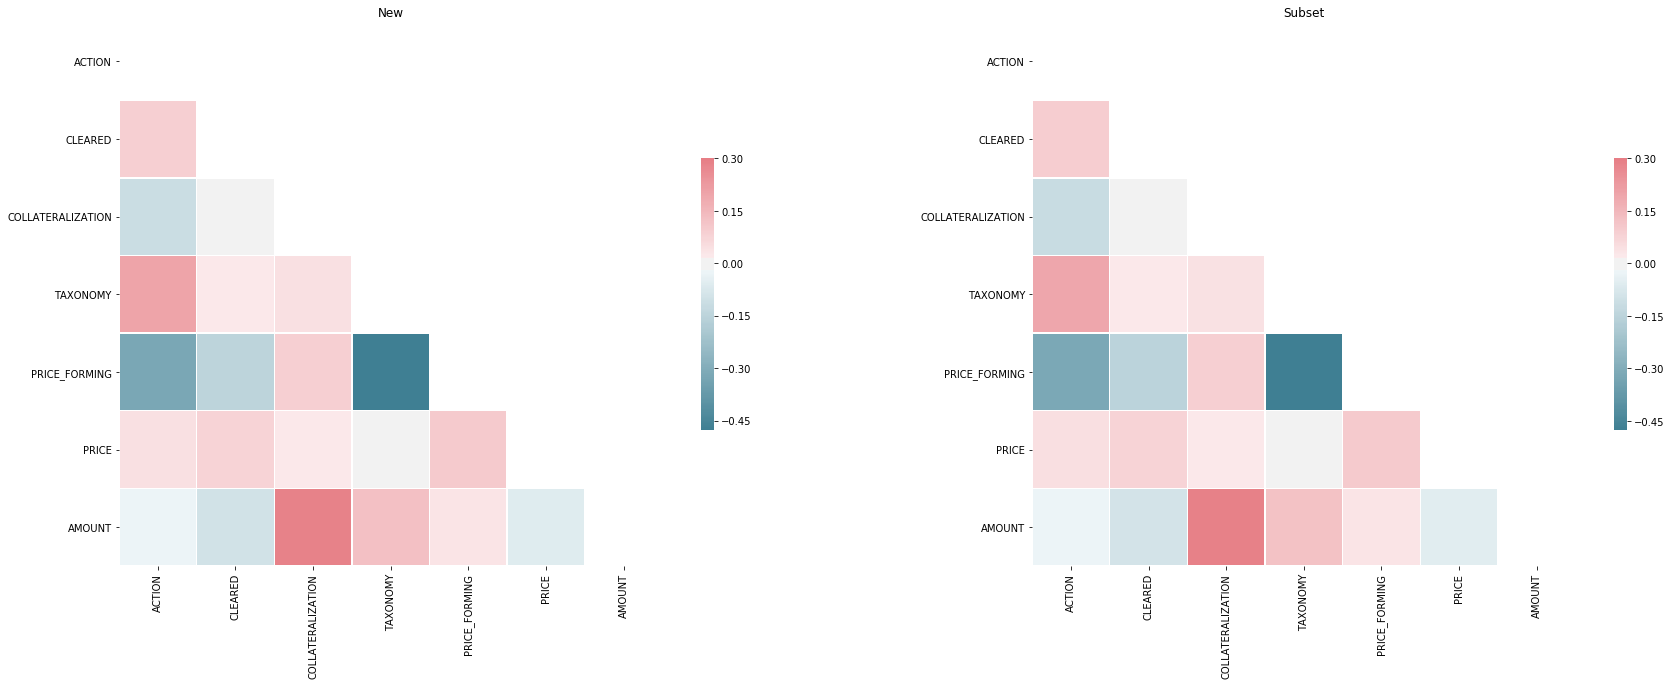

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Compute the correlation matrix
corr_1 = obj_data.corr()
corr_2 = obj_sub.corr()

# Generate a mask for the upper triangle
mask_1 = np.zeros_like(corr_1, dtype=np.bool)
mask_1[np.triu_indices_from(mask_1)] = True

mask_2 = np.zeros_like(corr_2, dtype=np.bool)
mask_2[np.triu_indices_from(mask_2)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(30, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_1, mask=mask_1, ax = ax[0], cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax[0].set_title("New")

sns.heatmap(corr_2, mask=mask_2, ax = ax[1], cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax[1].set_title("Subset")


Text(0.5,1,'Original')

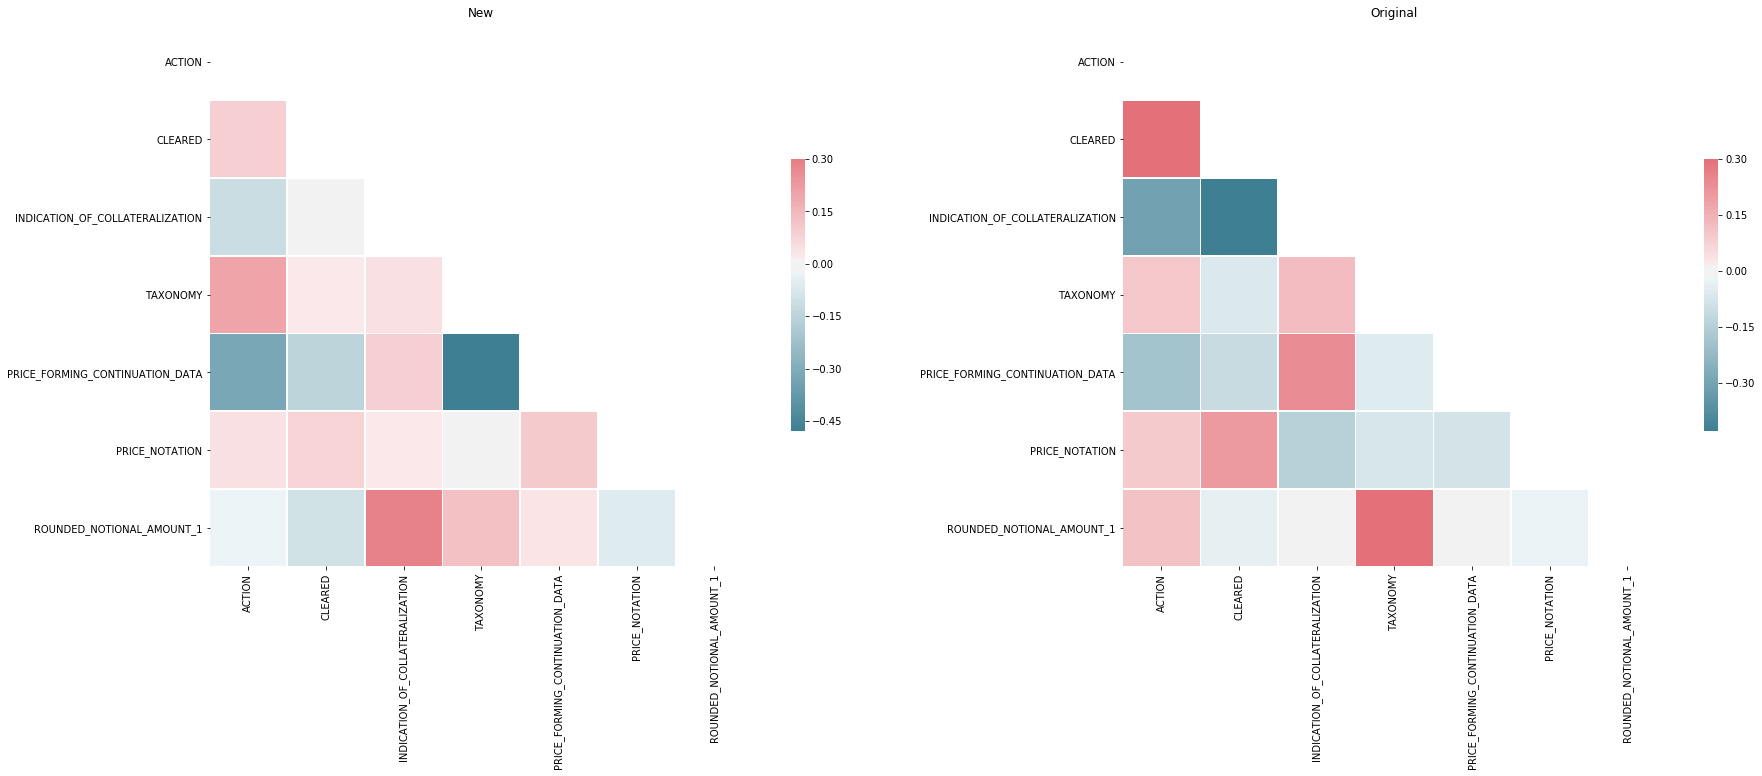

In [289]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Compute the correlation matrix
corr_1 = obj_data.corr()
corr_2 = obj_original.corr()

# Generate a mask for the upper triangle
mask_1 = np.zeros_like(corr_1, dtype=np.bool)
mask_1[np.triu_indices_from(mask)] = True

mask_2 = np.zeros_like(corr_2, dtype=np.bool)
mask_2[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(30, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_1, mask=mask_1, ax = ax[0], cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax[0].set_title("New")

sns.heatmap(corr_2, mask=mask_2, ax = ax[1], cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax[1].set_title("Original")


# Dependency among different features

In [207]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

# Cleared

## Performance on Sub_data

In [260]:
Y = obj_sub['CLEARED']
X = obj_sub.drop(['CLEARED'],axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20 ,random_state = 0)

## Rank1-Random Forest

In [226]:
rf_clear = RandomForestClassifier(random_state = 0)
rf_clear.fit(X_train, Y_train)
Y_pred = rf_clear.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.9556

## Rank2-Logistic Regression

In [261]:
log_clear = LogisticRegression(random_state = 0)
log_clear.fit(X_train, Y_train)
Y_pred = log_clear.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.79265

## Rank3-Linear SVM

In [232]:
svm_clear = LinearSVC(random_state = 0)
svm_clear.fit(X_train, Y_train)
Y_pred = svm_clear.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.7886

## Rank4-Multinomial Naive Bayes

In [210]:
# create a multinomial classifier
mnb_clear = MultinomialNB()
mnb_clear.fit(X_train, Y_train)
Y_pred = mnb_clear.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.64165

## Rank5-Gaussian Naive Bayes

In [196]:
gnb_clear = GaussianNB()
gnb_clear.fit(X_train, Y_train)
Y_pred = gnb_clear.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.3268

## Performance on original data

In [228]:
Y = obj_original['CLEARED']
X = obj_original.drop(['CLEARED'],axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20 ,random_state = 0)

## Rank1-Random Forest

In [229]:
rf_clear_original = RandomForestClassifier(random_state = 0)
rf_clear_original.fit(X_train, Y_train)
Y_pred = rf_clear_original.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.8714405360134003

## Rank2-Logistic Regression

In [217]:
log_clear_original = LogisticRegression(random_state = 0)
log_clear_original.fit(X_train, Y_train)
Y_pred = log_clear_original.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.7453936348408711

## Rank3-Linear SVM

In [214]:
svm_clear_original = LinearSVC(random_state = 0)
svm_clear_original.fit(X_train, Y_train)
Y_pred = svm_clear_original.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.7311557788944724

## Rank4-Multinomial Naive Bayes

In [216]:
# create a multinomial classifier
mnb_clear_original = MultinomialNB()
mnb_clear_original.fit(X_train, Y_train)
Y_pred = mnb_clear_original.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.623534338358459

## Rank5-Gaussian Naive Bayes

In [215]:
gnb_clear_original = GaussianNB()
gnb_clear_original.fit(X_train, Y_train)
Y_pred = gnb_clear_original.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.5778894472361809

In [262]:
def evaluate_model(X_train, Y_train, X_test, Y_test):
    accuracy = []
    rf = RandomForestClassifier(random_state = 0)
    rf.fit(X_train, Y_train)
    Y_pred = rf.predict(X_test)
    accuracy.append(accuracy_score(Y_test,Y_pred))
    
    log = LogisticRegression(random_state = 0)
    log.fit(X_train, Y_train)
    Y_pred = log.predict(X_test)
    accuracy.append(accuracy_score(Y_test,Y_pred))
    
    svm = LinearSVC(random_state = 0)
    svm.fit(X_train, Y_train)
    Y_pred = svm.predict(X_test)
    accuracy.append(accuracy_score(Y_test,Y_pred))
    
    mnb = MultinomialNB()
    mnb.fit(X_train, Y_train)
    Y_pred = mnb.predict(X_test)
    accuracy.append(accuracy_score(Y_test,Y_pred))
    
    gnb = GaussianNB()
    gnb.fit(X_train, Y_train)
    Y_pred = gnb.predict(X_test)
    accuracy.append(accuracy_score(Y_test,Y_pred))
    
    #svc_colla = SVC(random_state = 0)
    #svc_colla.fit(X_train, Y_train)
    #Y_pred = svc_colla.predict(X_test)
    #svc_colla_score = accuracy_score(Y_test,Y_pred)
    #svc_colla_score
    
    return accuracy

In [263]:
def get_SRA(new,old):
    temp = 0
    count = 0
    new = np.array(new)
    old = np.array(old)
    for i in range(len(new)):
        for j in range(i+1,len(old)):
            count = count + 1
            if ((new[i]-new[j])*(old[i]-old[j]))>=0: temp = temp +1
    r = (temp/count)
    return r

# Cleared

In [264]:
Y = obj_original['CLEARED']
X = obj_original.drop(['CLEARED'],axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20 ,random_state = 0)
old = evaluate_model(X_train, Y_train, X_test, Y_test)
old

[0.8714405360134003,
 0.7453936348408711,
 0.6930485762144054,
 0.623534338358459,
 0.5778894472361809]

In [265]:
Y = obj_sub['CLEARED']
X = obj_sub.drop(['CLEARED'],axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20 ,random_state = 0)
new = evaluate_model(X_train, Y_train, X_test, Y_test)
new

[0.983, 0.79265, 0.7886, 0.64165, 0.3268]

In [266]:
get_SRA(new, old)

1.0

# Collateralization

## Performance on original data

In [267]:
Y = obj_original['INDICATION_OF_COLLATERALIZATION']
X = obj_original.drop(['INDICATION_OF_COLLATERALIZATION'],axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20 ,random_state = 0)
old = evaluate_model(X_train, Y_train, X_test, Y_test)
old

[0.7286432160804021,
 0.6612227805695142,
 0.6298157453936348,
 0.5079564489112228,
 0.5954773869346733]

## Performance on sub data

In [268]:
Y = obj_sub['INDICATION_OF_COLLATERALIZATION']
X = obj_sub.drop(['INDICATION_OF_COLLATERALIZATION'],axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20 ,random_state = 0)
new = evaluate_model(X_train, Y_train, X_test, Y_test)
new

[0.9556, 0.51195, 0.5322, 0.40935, 0.41985]

In [269]:
get_SRA(new, old)

0.9

# Taxonomy

## Performance on original data

In [271]:
Y = obj_original['TAXONOMY']
X = obj_original.drop(['TAXONOMY'],axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20 ,random_state = 0)
old = evaluate_model(X_train, Y_train, X_test, Y_test)
old

[0.9870184254606366,
 0.7177554438860971,
 0.6959798994974874,
 0.7223618090452262,
 0.6633165829145728]

## Performance on sub data

In [272]:
Y = obj_sub['TAXONOMY']
X = obj_sub.drop(['TAXONOMY'],axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20 ,random_state = 0)
new = evaluate_model(X_train, Y_train, X_test, Y_test)
new

[0.9945, 0.7822, 0.6422, 0.56365, 0.7501]

In [273]:
get_SRA(new, old)

0.6

## PRICE_FORMING_CONTINUATION_DATA

In [277]:
Y = obj_original['PRICE_FORMING_CONTINUATION_DATA']
X = obj_original.drop(['PRICE_FORMING_CONTINUATION_DATA'],axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20 ,random_state = 0)
old = evaluate_model(X_train, Y_train, X_test, Y_test)
old

[0.8835845896147404,
 0.8609715242881072,
 0.8572026800670016,
 0.7713567839195979,
 0.5251256281407035]

In [278]:
Y = obj_sub['PRICE_FORMING_CONTINUATION_DATA']
X = obj_sub.drop(['PRICE_FORMING_CONTINUATION_DATA'],axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20 ,random_state = 0)
new = evaluate_model(X_train, Y_train, X_test, Y_test)
new

[0.97555, 0.7603, 0.72785, 0.40145, 0.5215]

In [279]:
get_SRA(new, old)

0.9

# Action

In [281]:
Y = obj_original['ACTION']
X = obj_original.drop(['ACTION'],axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20 ,random_state = 0)
old = evaluate_model(X_train, Y_train, X_test, Y_test)
old

[0.8232830820770519,
 0.7747068676716918,
 0.7935510887772195,
 0.5866834170854272,
 0.6582914572864321]

In [282]:
Y = obj_sub['ACTION']
X = obj_sub.drop(['ACTION'],axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20 ,random_state = 0)
new = evaluate_model(X_train, Y_train, X_test, Y_test)
new

[0.993, 0.79815, 0.78355, 0.68255, 0.6751]

In [283]:
get_SRA(new, old)

0.8

# check duplication

In [79]:
sum(data.duplicated(subset=None, keep='first'))

718882

In [89]:
sum(data.duplicated(['ACTION', 'CLEARED', 'INDICATION_OF_COLLATERALIZATION', 'TAXONOMY', 'PRICE_FORMING_CONTINUATION_DATA']))


719215

In [90]:
data.shape[0]

719283

In [94]:
sum(original.duplicated())

6151

In [95]:
6151/11936

0.5153317694369973

In [91]:
sum(original.duplicated(['ACTION', 'CLEARED', 'INDICATION_OF_COLLATERALIZATION', 'TAXONOMY', 'PRICE_FORMING_CONTINUATION_DATA']))


11853

In [92]:
original.shape[0]

11936

In [93]:
11853/11936

0.9930462466487936

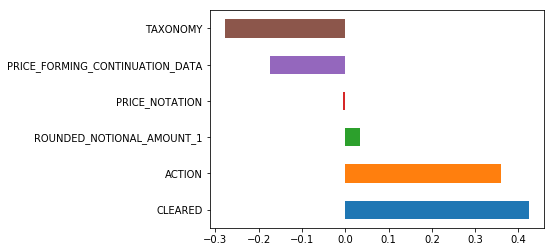

In [73]:
pd.Series(svm.coef_[0], index=X_train.columns).nlargest(10).plot(kind='barh')